In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib as plt
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import _LRScheduler

%run '/kaggle/input/icdar19-wsegs-cte-dataloader/CTE.ipynb'
%run '/kaggle/input/icdar19-wsegs-cte-dataloader/dataloader_ICDAR19_lsegs.ipynb'


import numpy as np
import os

torch.Size([1, 105])


In [2]:
class LabelSomCE(nn.Module):
	def __init__(self):
		super().__init__()

	def forward(self,x,target,smoothing=0.1):
		confidence = 1.0 - smoothing
		logprobs = F.log_softmax(x,dim=-1)
		nll_loss = - logprobs.gather(dim=-1,index=target.unsqueeze(1))
		nll_loss = nll_loss.squeeze(1)
		smooth_loss = -logprobs.mean(dim=-1)
		loss = confidence * nll_loss + smoothing * smooth_loss

		return loss.mean()

def download(folder,thetarfile):
    import urllib.request
    import tarfile
    ftpstream = urllib.request.urlopen(thetarfile)
    thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
    thetarfile.extractall(folder)
    thetarfile.close()

def download_cerug(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-test-images.tar.gz"
    download(folder,thetarfile)

def download_firemaker(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-test-images.tar.gz"
    download(folder,thetarfile)


ICDAR19_wsegsICDAR19_wsegswriter_index_table.pickle
----------
loading dataset /kaggle/input/cvl-words/cvl_word_segments with images: 69839
number of writer is: 310
-*-*-*-*-*-*-*-*-*-*
ICDAR19_wsegsICDAR19_wsegswriter_index_table.pickle
----------
loading dataset /kaggle/input/cvl-words/cvl_word_segments with images: 9914
number of writer is: 310
-*-*-*-*-*-*-*-*-*-*
Traing epoch: 0   avg loss is: 6.307837256753696
Testing epoch: 0   avg testing loss is: 3.6085789911208614
Validating on epoch: 0 has accuracy: top1: 28.76 top5: 60.29


/tmp/ipykernel_23/2828233680.py:133: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Validating on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
/tmp/ipykernel_23/2828233680.py:135: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp.write('Validating epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))


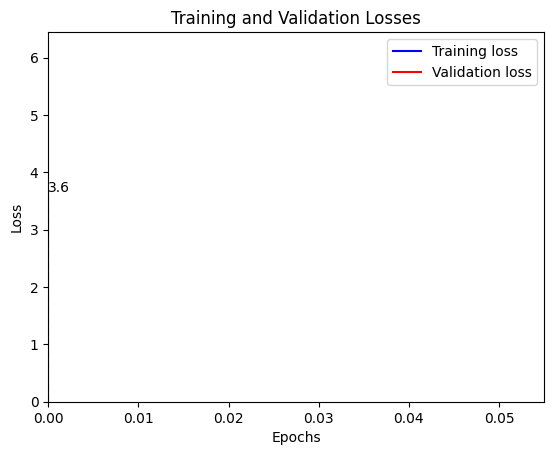

Traing epoch: 1   avg loss is: 3.2748727314413193
Testing epoch: 1   avg testing loss is: 2.8787846815201545
Validating on epoch: 1 has accuracy: top1: 48.58 top5: 79.73


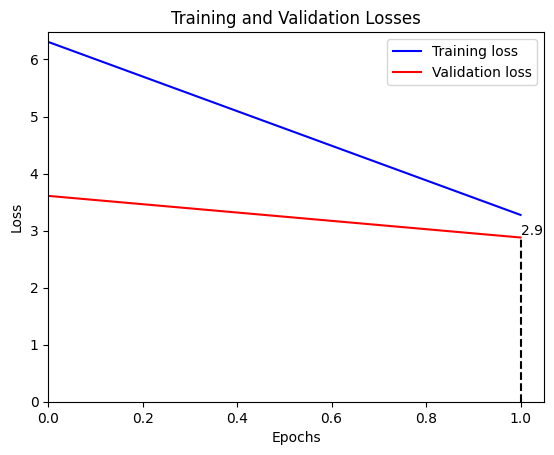

Traing epoch: 2   avg loss is: 2.641034469404535
Testing epoch: 2   avg testing loss is: 2.2630707758088264
Validating on epoch: 2 has accuracy: top1: 67.57 top5: 89.51


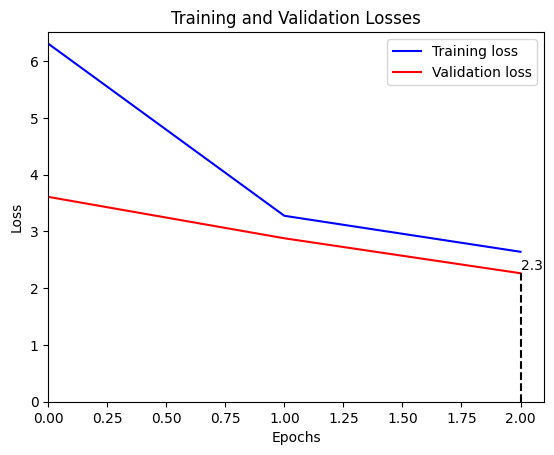

Traing epoch: 3   avg loss is: 2.287736858117482
Testing epoch: 3   avg testing loss is: 2.171483596294157
Validating on epoch: 3 has accuracy: top1: 69.75 top5: 90.71


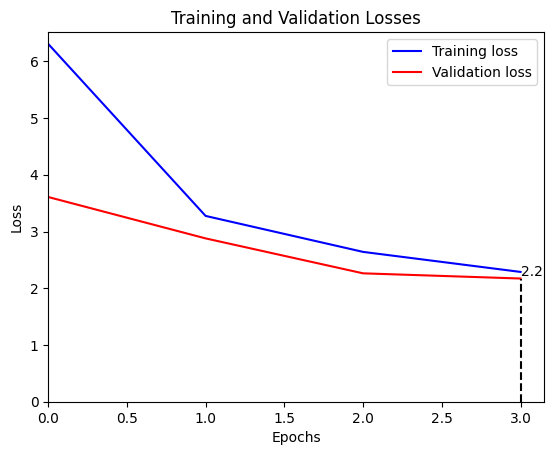

Traing epoch: 4   avg loss is: 2.060629693113479
Testing epoch: 4   avg testing loss is: 1.9499422011836882
Validating on epoch: 4 has accuracy: top1: 77.31 top5: 94.20


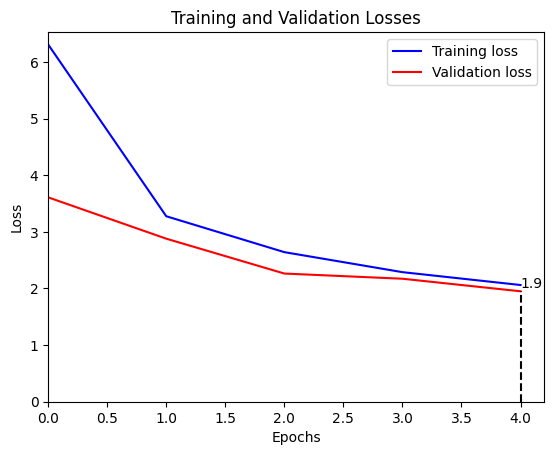

Traing epoch: 5   avg loss is: 1.9023903992119238
Testing epoch: 5   avg testing loss is: 2.144292140391565
Validating on epoch: 5 has accuracy: top1: 69.14 top5: 91.40


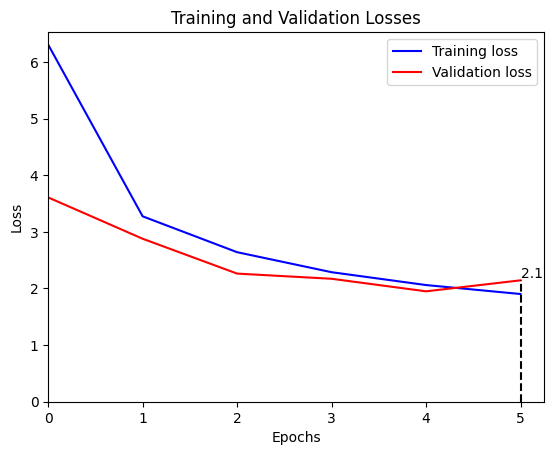

Traing epoch: 6   avg loss is: 1.7760844647501937
Testing epoch: 6   avg testing loss is: 1.8020365443921857
Validating on epoch: 6 has accuracy: top1: 80.38 top5: 95.58


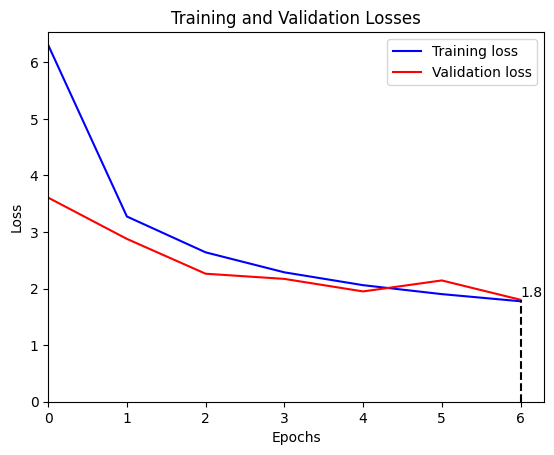

Traing epoch: 7   avg loss is: 1.680087969512922
Testing epoch: 7   avg testing loss is: 1.7288262519144242
Validating on epoch: 7 has accuracy: top1: 82.97 top5: 96.22


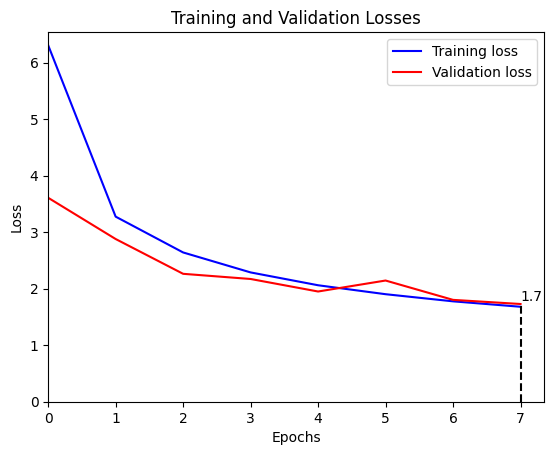

Traing epoch: 8   avg loss is: 1.6046051787576143
Testing epoch: 8   avg testing loss is: 1.6496867297157165
Validating on epoch: 8 has accuracy: top1: 85.34 top5: 96.44


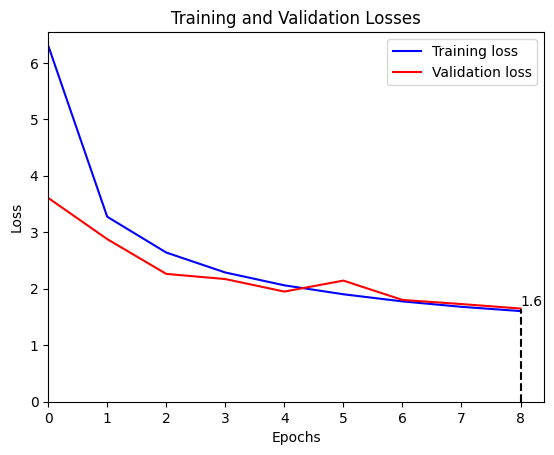

Traing epoch: 9   avg loss is: 1.5367070390859074
Testing epoch: 9   avg testing loss is: 1.637394529196524
Validating on epoch: 9 has accuracy: top1: 85.48 top5: 96.76


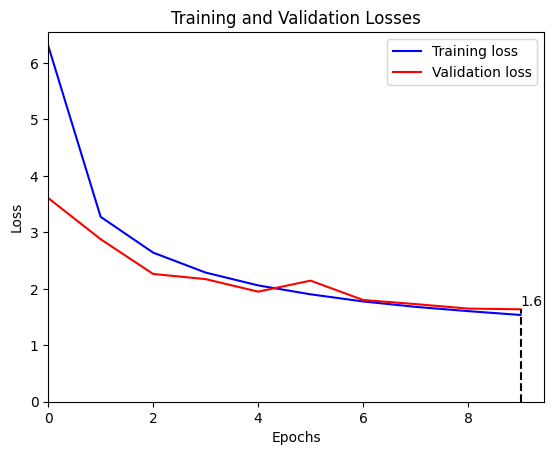

Traing epoch: 10   avg loss is: 1.3476138477692574
Testing epoch: 10   avg testing loss is: 1.4363680633806413
Validating on epoch: 10 has accuracy: top1: 91.27 top5: 98.14


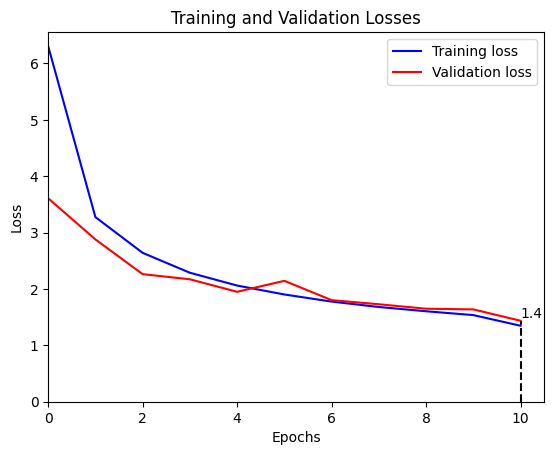

Traing epoch: 11   avg loss is: 1.300984461901933
Testing epoch: 11   avg testing loss is: 1.4125954447254059
Validating on epoch: 11 has accuracy: top1: 91.85 top5: 98.28


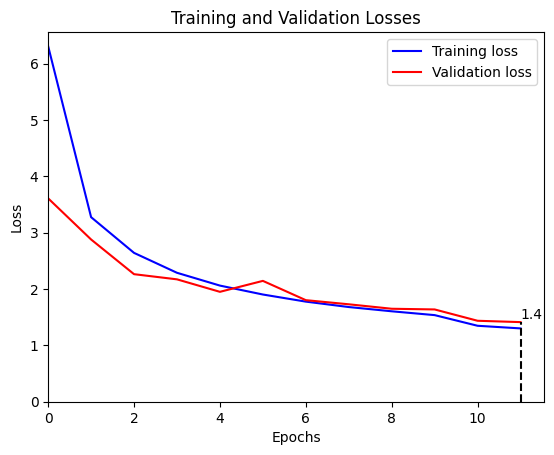

Traing epoch: 12   avg loss is: 1.2688402470156865
Testing epoch: 12   avg testing loss is: 1.3865835355174156
Validating on epoch: 12 has accuracy: top1: 92.54 top5: 98.39


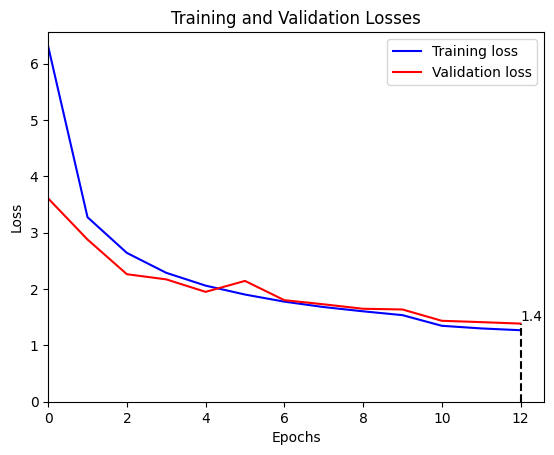

Traing epoch: 13   avg loss is: 1.2431427526102494
Testing epoch: 13   avg testing loss is: 1.3908045845647012
Validating on epoch: 13 has accuracy: top1: 92.39 top5: 98.36


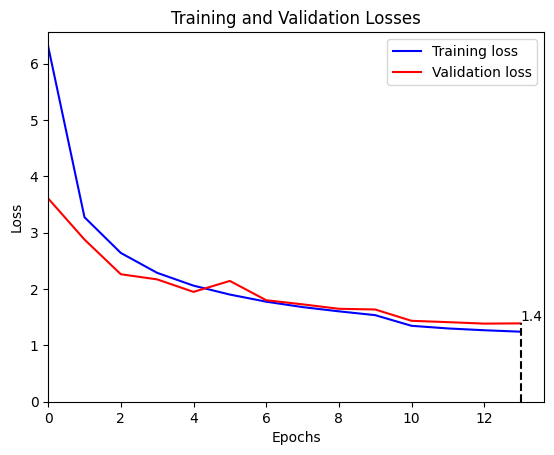

Traing epoch: 14   avg loss is: 1.2190056914970702
Testing epoch: 14   avg testing loss is: 1.415107319239647
Validating on epoch: 14 has accuracy: top1: 91.18 top5: 98.19


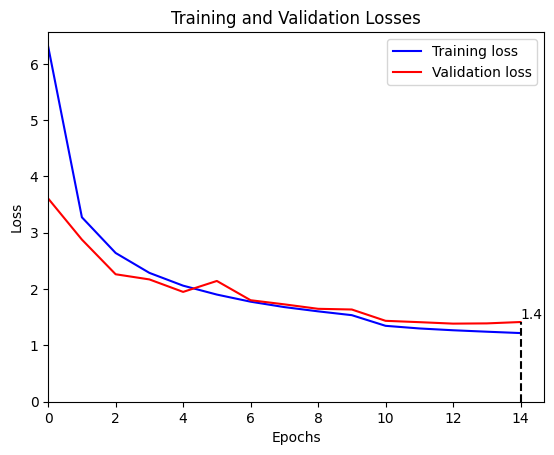

Traing epoch: 15   avg loss is: 1.1965709263091782
Testing epoch: 15   avg testing loss is: 1.3670962475961255
Validating on epoch: 15 has accuracy: top1: 92.80 top5: 98.41


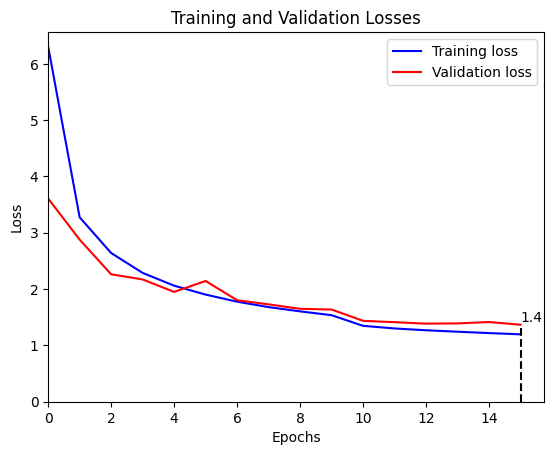

Traing epoch: 16   avg loss is: 1.1810210633452718
Testing epoch: 16   avg testing loss is: 1.344866248676854
Validating on epoch: 16 has accuracy: top1: 93.04 top5: 98.52


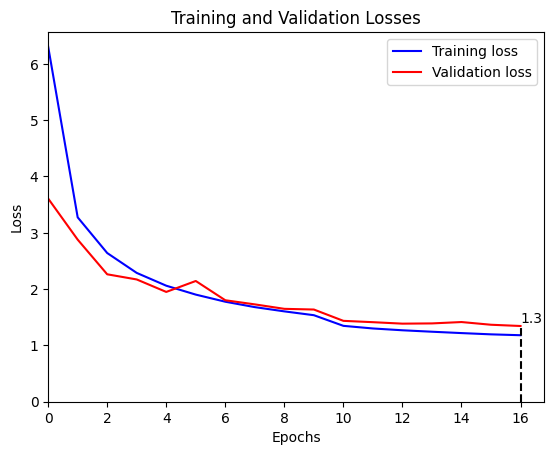

Traing epoch: 17   avg loss is: 1.1636374721988203
Testing epoch: 17   avg testing loss is: 1.3495813919651893
Validating on epoch: 17 has accuracy: top1: 92.45 top5: 98.15


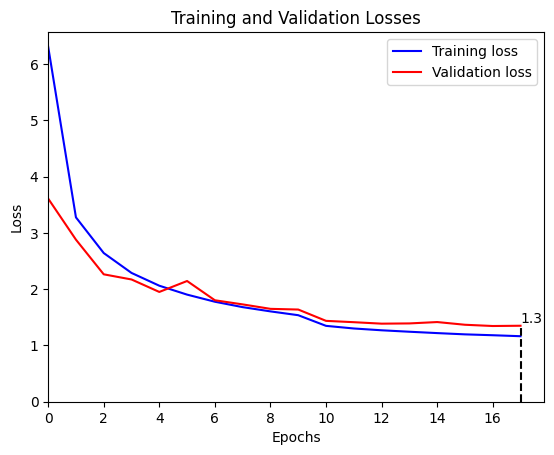

Traing epoch: 18   avg loss is: 1.1485501315263735
Testing epoch: 18   avg testing loss is: 1.3227712050560982
Validating on epoch: 18 has accuracy: top1: 93.28 top5: 98.53


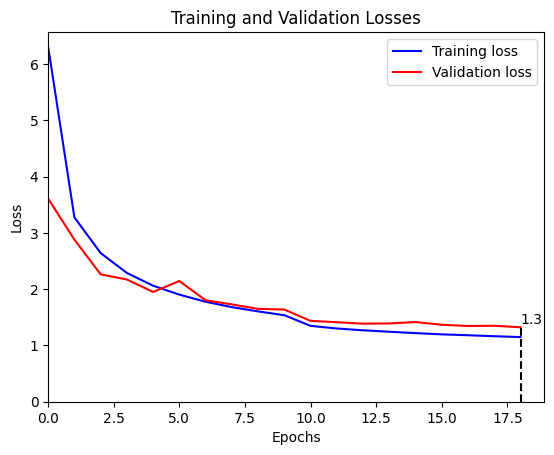

Traing epoch: 19   avg loss is: 1.1347294582837661
Testing epoch: 19   avg testing loss is: 1.3227887855422111
Validating on epoch: 19 has accuracy: top1: 93.34 top5: 98.37


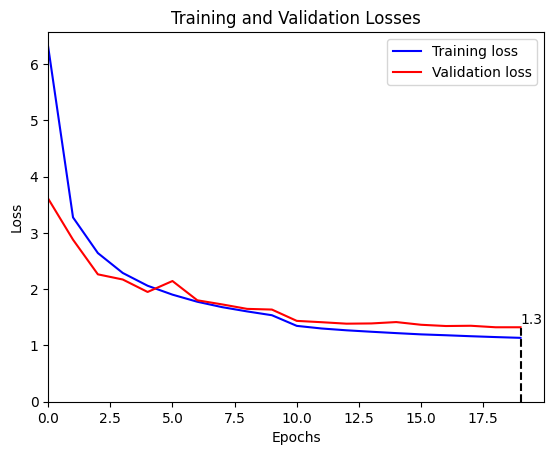

Traing epoch: 20   avg loss is: 1.0789973524379468
Testing epoch: 20   avg testing loss is: 1.2566911858897056
Validating on epoch: 20 has accuracy: top1: 94.94 top5: 98.73


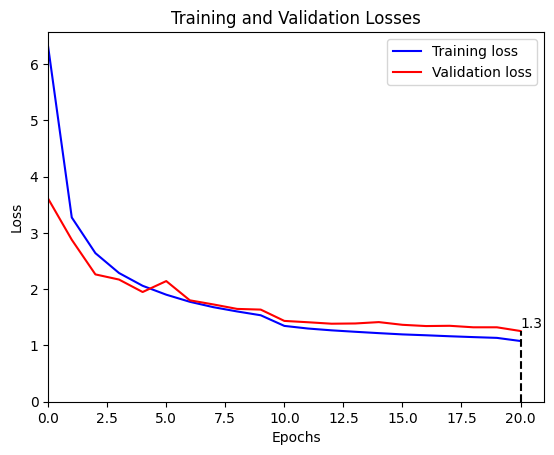

Traing epoch: 21   avg loss is: 1.0670577627218283
Testing epoch: 21   avg testing loss is: 1.252772332006885
Validating on epoch: 21 has accuracy: top1: 94.85 top5: 98.69


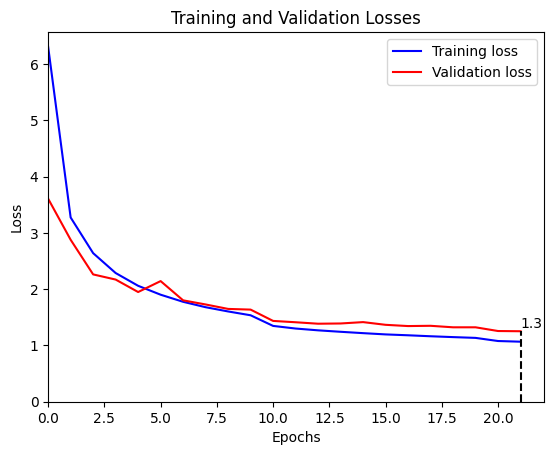

Traing epoch: 22   avg loss is: 1.058562793636628
Testing epoch: 22   avg testing loss is: 1.2553606077547996
Validating on epoch: 22 has accuracy: top1: 94.42 top5: 98.70


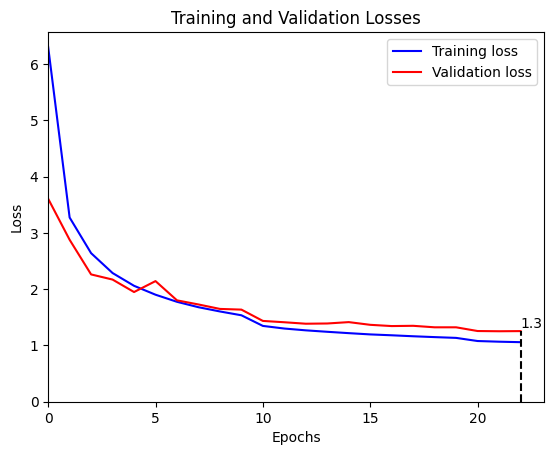

Traing epoch: 23   avg loss is: 1.0522946399302793
Testing epoch: 23   avg testing loss is: 1.2470729441412034
Validating on epoch: 23 has accuracy: top1: 95.19 top5: 98.61


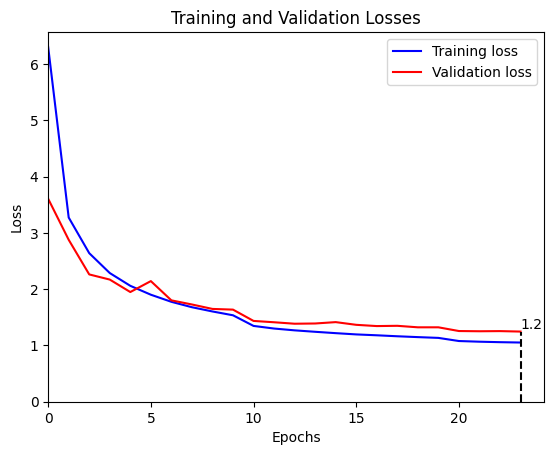

Traing epoch: 24   avg loss is: 1.0464745147664212
Testing epoch: 24   avg testing loss is: 1.2584628805037468
Validating on epoch: 24 has accuracy: top1: 94.39 top5: 98.73


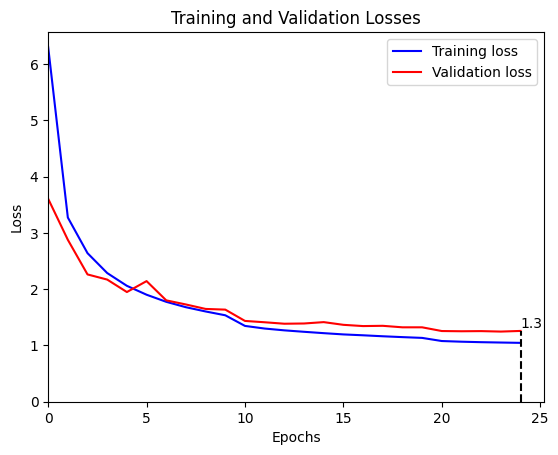

Traing epoch: 25   avg loss is: 1.0405464242703317
Testing epoch: 25   avg testing loss is: 1.2481617556464288
Validating on epoch: 25 has accuracy: top1: 94.84 top5: 98.53


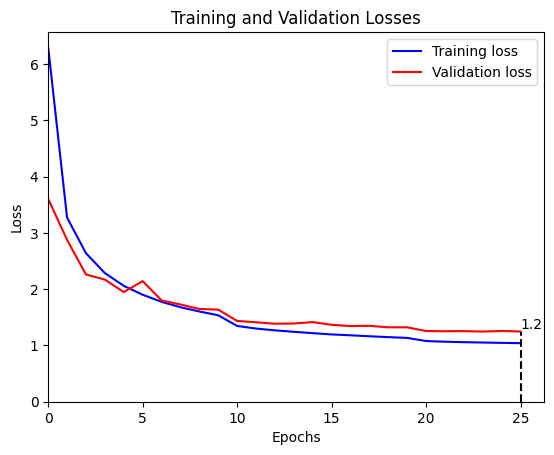

Traing epoch: 26   avg loss is: 1.0357205329085577
Testing epoch: 26   avg testing loss is: 1.253885708701226
Validating on epoch: 26 has accuracy: top1: 94.75 top5: 98.58


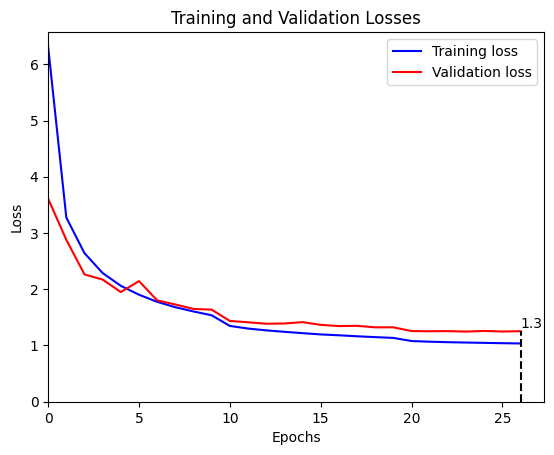

Traing epoch: 27   avg loss is: 1.031470145289227
Testing epoch: 27   avg testing loss is: 1.2335148891133647
Validating on epoch: 27 has accuracy: top1: 95.06 top5: 98.67


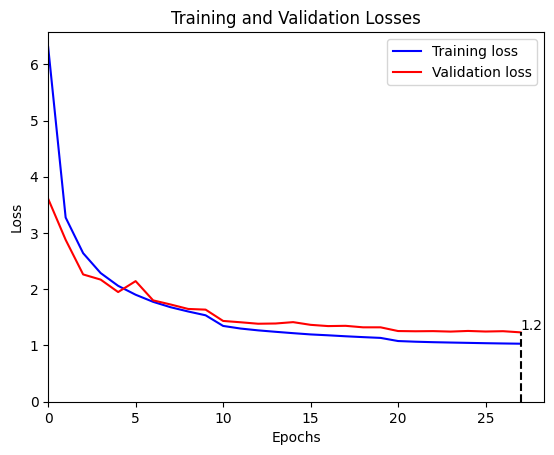

Traing epoch: 28   avg loss is: 1.0273695480211626
Testing epoch: 28   avg testing loss is: 1.241959836886775
Validating on epoch: 28 has accuracy: top1: 94.67 top5: 98.71


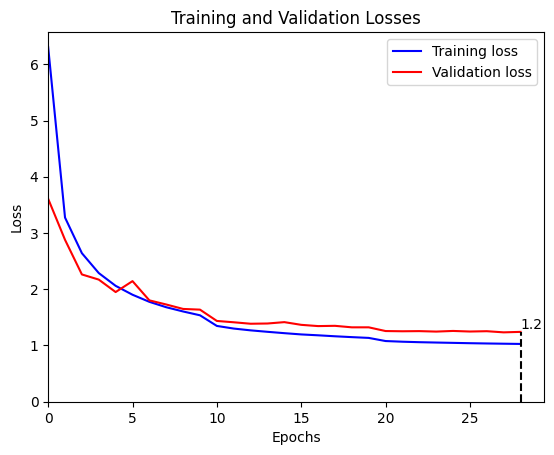

Traing epoch: 29   avg loss is: 1.022965800915149
Testing epoch: 29   avg testing loss is: 1.237117668313365
Validating on epoch: 29 has accuracy: top1: 95.05 top5: 98.71


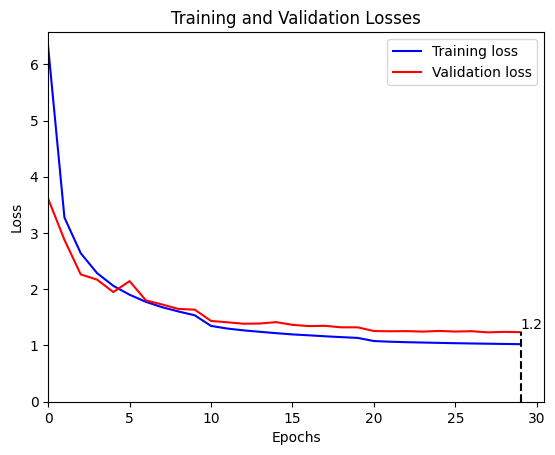

Traing epoch: 30   avg loss is: 1.004903529716893
Testing epoch: 30   avg testing loss is: 1.2150914715182397
Validating on epoch: 30 has accuracy: top1: 95.32 top5: 98.81


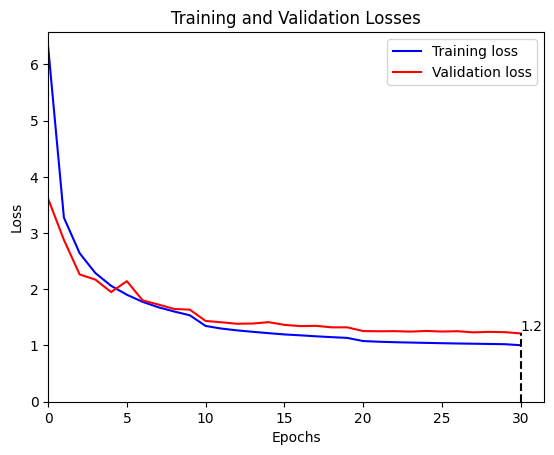

Traing epoch: 31   avg loss is: 1.0002043314967868
Testing epoch: 31   avg testing loss is: 1.2161574839584288
Validating on epoch: 31 has accuracy: top1: 95.35 top5: 98.79


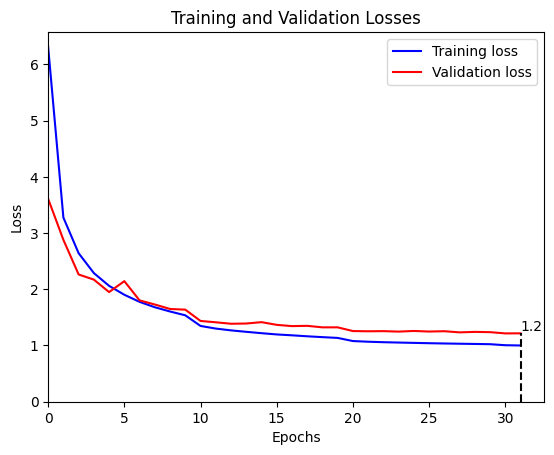

Traing epoch: 32   avg loss is: 0.9971792908926604
Testing epoch: 32   avg testing loss is: 1.2137728016222677
Validating on epoch: 32 has accuracy: top1: 95.47 top5: 98.74


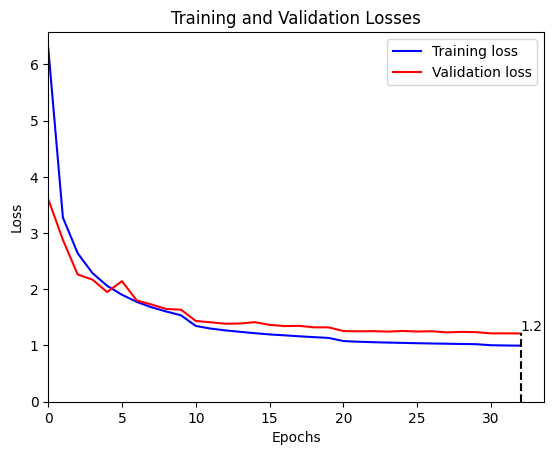

Traing epoch: 33   avg loss is: 0.9951980376768068
Testing epoch: 33   avg testing loss is: 1.2130331497999929
Validating on epoch: 33 has accuracy: top1: 95.34 top5: 98.73


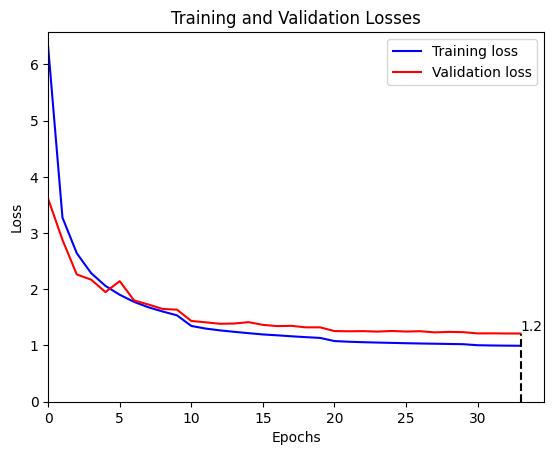

Traing epoch: 34   avg loss is: 0.9931122843384415
Testing epoch: 34   avg testing loss is: 1.206269232592275
Validating on epoch: 34 has accuracy: top1: 95.62 top5: 98.78


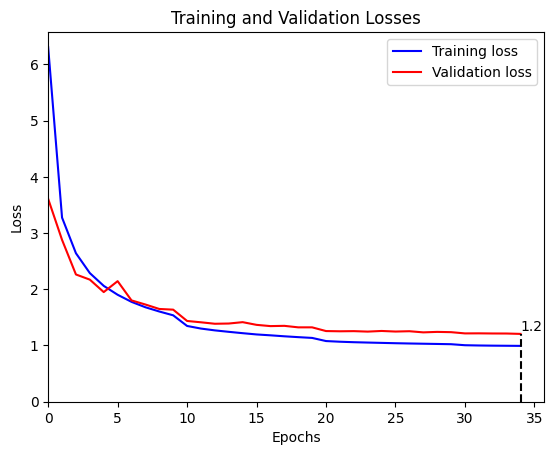

Traing epoch: 35   avg loss is: 0.9909123244578416
Testing epoch: 35   avg testing loss is: 1.2095739055064416
Validating on epoch: 35 has accuracy: top1: 95.45 top5: 98.71


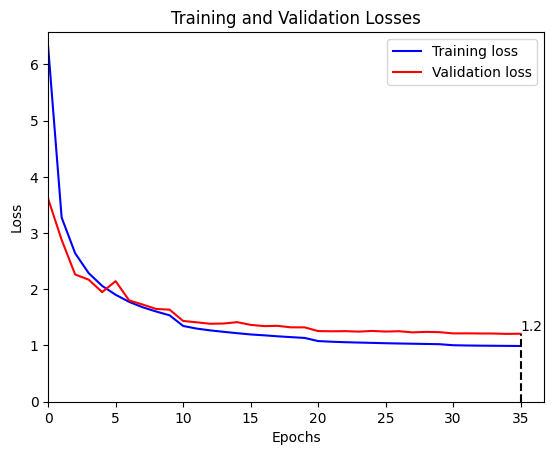

Traing epoch: 36   avg loss is: 0.9888913474096058
Testing epoch: 36   avg testing loss is: 1.2170810121682383
Validating on epoch: 36 has accuracy: top1: 95.54 top5: 98.78


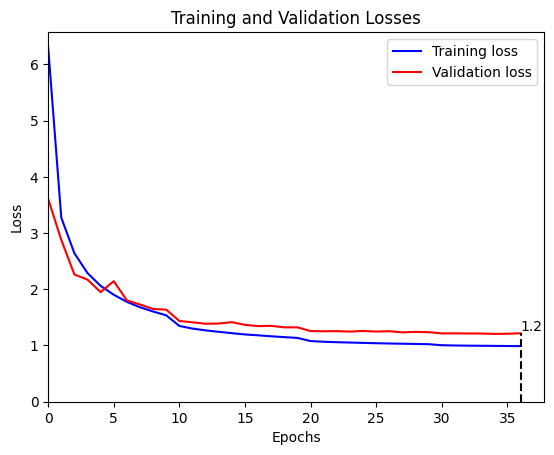

Traing epoch: 37   avg loss is: 0.9873236068255523
Testing epoch: 37   avg testing loss is: 1.2179746052911204
Validating on epoch: 37 has accuracy: top1: 95.57 top5: 98.75


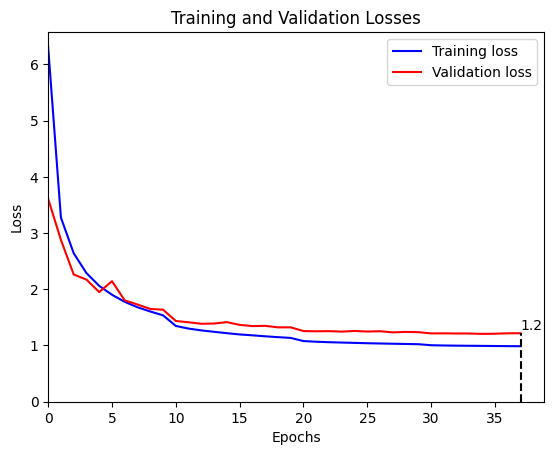

Traing epoch: 38   avg loss is: 0.9856727088978267
Testing epoch: 38   avg testing loss is: 1.2120824256250935
Validating on epoch: 38 has accuracy: top1: 95.40 top5: 98.69


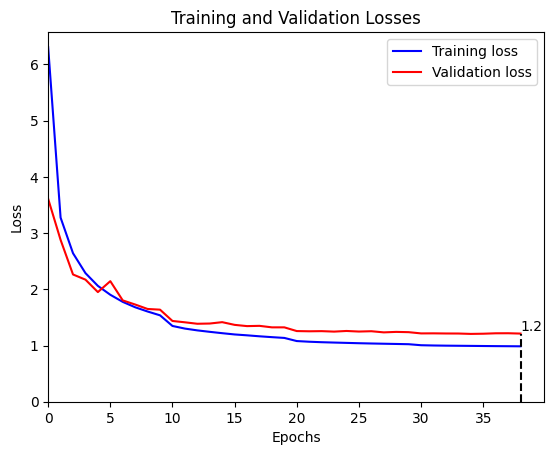

Traing epoch: 39   avg loss is: 0.984159111266394
Testing epoch: 39   avg testing loss is: 1.2046971292265
Validating on epoch: 39 has accuracy: top1: 95.63 top5: 98.72


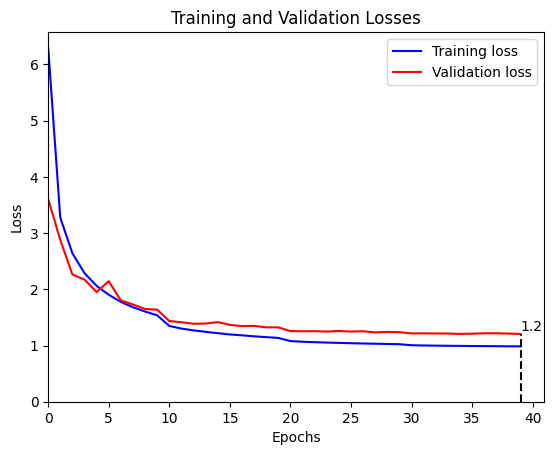

Traing epoch: 40   avg loss is: 0.9769934351760023
Testing epoch: 40   avg testing loss is: 1.2055082125048484
Validating on epoch: 40 has accuracy: top1: 95.78 top5: 98.84


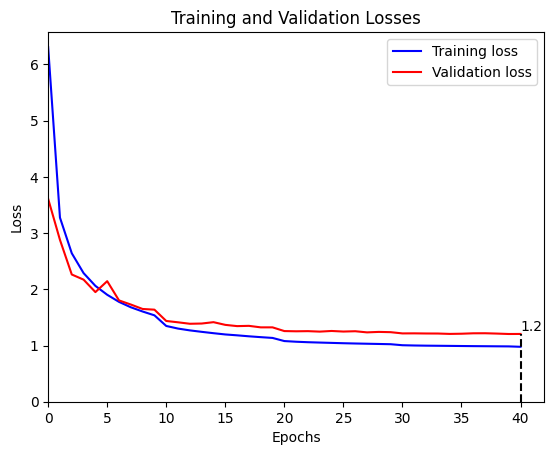

Traing epoch: 41   avg loss is: 0.9756624318666135
Testing epoch: 41   avg testing loss is: 1.2085699592867205
Validating on epoch: 41 has accuracy: top1: 95.64 top5: 98.72


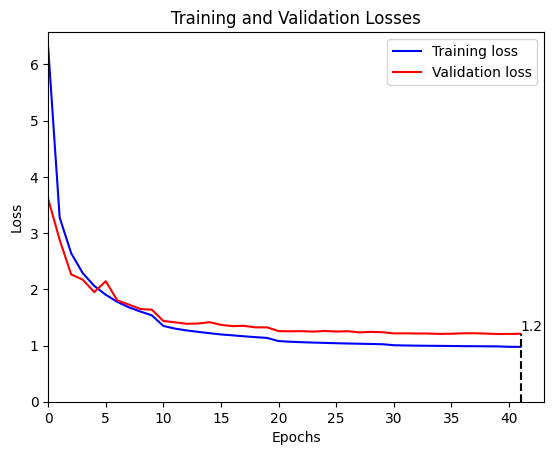

Traing epoch: 42   avg loss is: 0.9738422979000618
Testing epoch: 42   avg testing loss is: 1.2083308778462871
Validating on epoch: 42 has accuracy: top1: 95.73 top5: 98.75


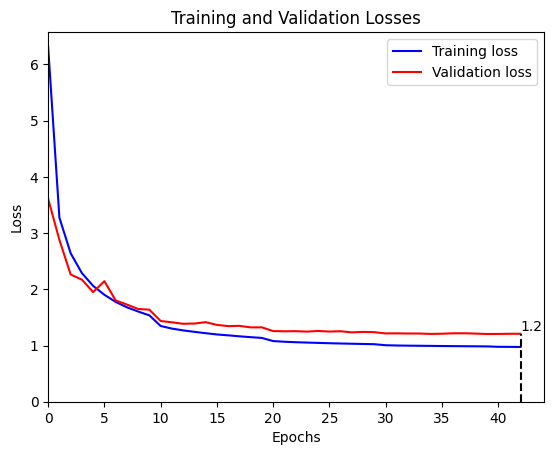

Traing epoch: 43   avg loss is: 0.9730917655552996
Testing epoch: 43   avg testing loss is: 1.2079398740683833
Validating on epoch: 43 has accuracy: top1: 95.77 top5: 98.76


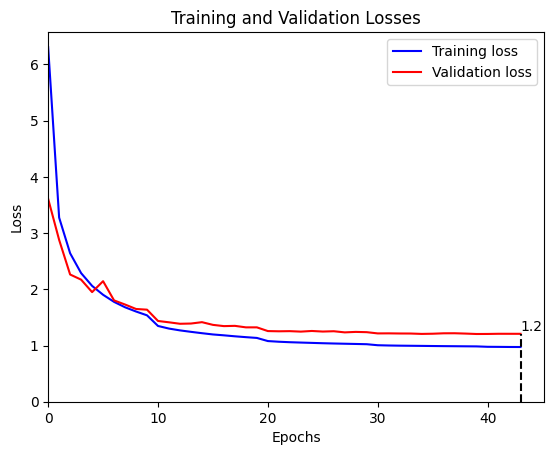

Traing epoch: 44   avg loss is: 0.9722982008286729
Testing epoch: 44   avg testing loss is: 1.2007270494776388
Validating on epoch: 44 has accuracy: top1: 95.73 top5: 98.80


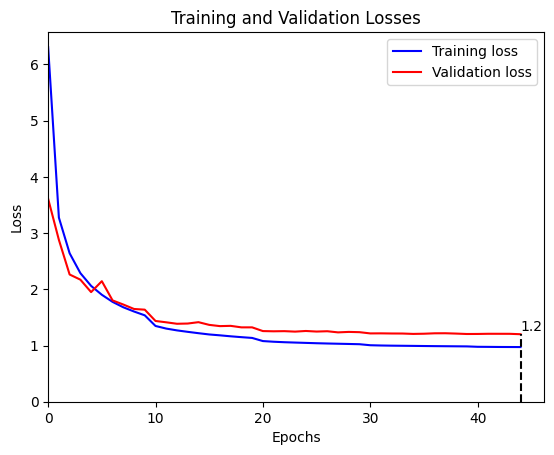

Traing epoch: 45   avg loss is: 0.9712971574690886
Testing epoch: 45   avg testing loss is: 1.2076996308180594
Validating on epoch: 45 has accuracy: top1: 95.73 top5: 98.78


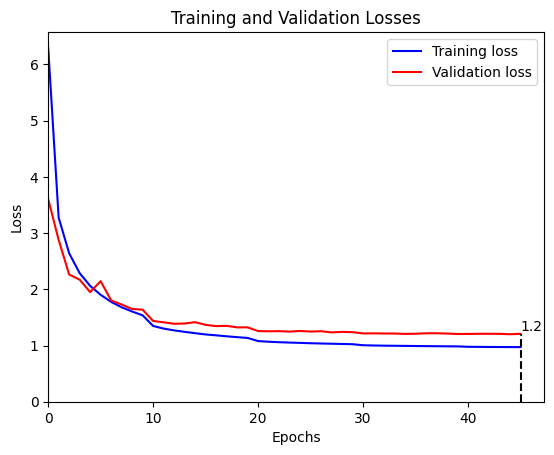

Traing epoch: 46   avg loss is: 0.970441793051474
Testing epoch: 46   avg testing loss is: 1.2089509644815999
Validating on epoch: 46 has accuracy: top1: 95.80 top5: 98.70


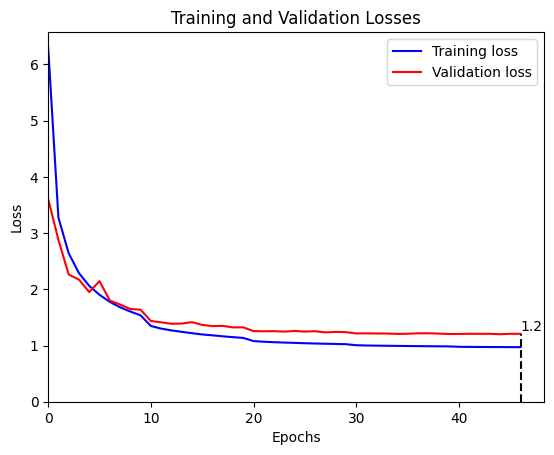

Traing epoch: 47   avg loss is: 0.9693508012293677
Testing epoch: 47   avg testing loss is: 1.201360457943332
Validating on epoch: 47 has accuracy: top1: 95.86 top5: 98.80


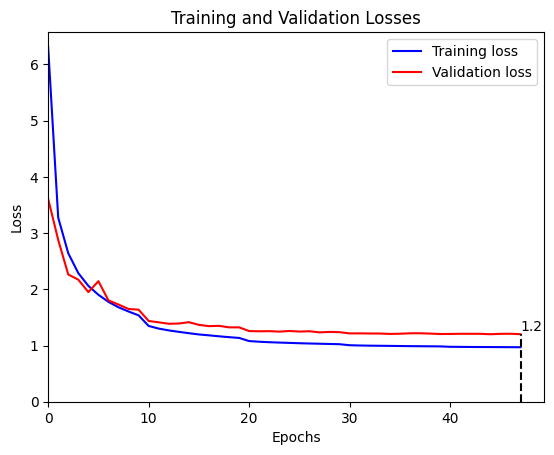

Traing epoch: 48   avg loss is: 0.9688900908699394
Testing epoch: 48   avg testing loss is: 1.199380376165913
Validating on epoch: 48 has accuracy: top1: 95.90 top5: 98.75


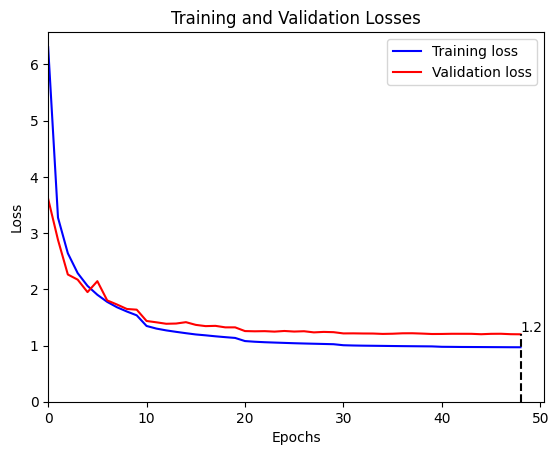

Traing epoch: 49   avg loss is: 0.9682520715524908
Testing epoch: 49   avg testing loss is: 1.2009808260586954
Validating on epoch: 49 has accuracy: top1: 95.82 top5: 98.79


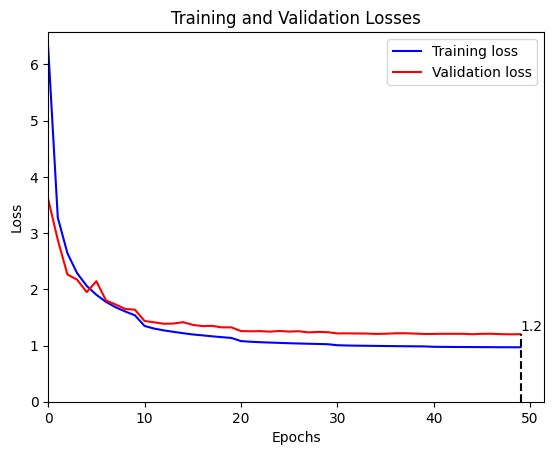

Traing epoch: 50   avg loss is: 0.9653444654836664
Testing epoch: 50   avg testing loss is: 1.206939237540768
Validating on epoch: 50 has accuracy: top1: 95.85 top5: 98.77


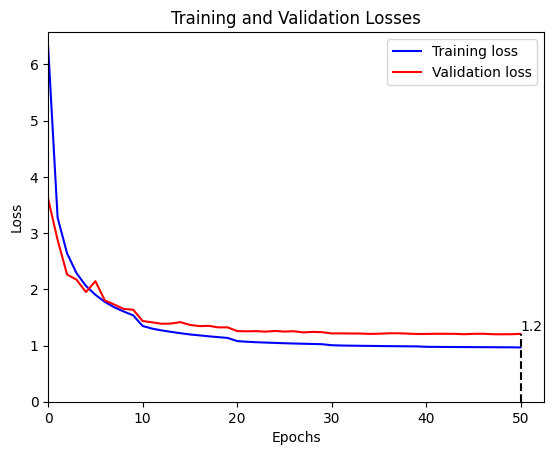

Traing epoch: 51   avg loss is: 0.964391283561176
Testing epoch: 51   avg testing loss is: 1.207118141555017
Validating on epoch: 51 has accuracy: top1: 95.79 top5: 98.84


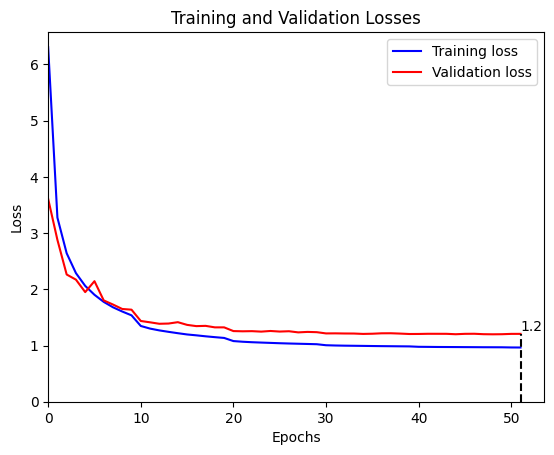

Traing epoch: 52   avg loss is: 0.9640593082668801
Testing epoch: 52   avg testing loss is: 1.203576995095899
Validating on epoch: 52 has accuracy: top1: 95.67 top5: 98.80


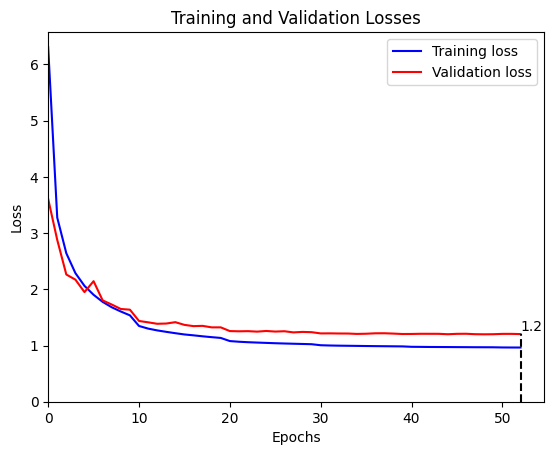

Traing epoch: 53   avg loss is: 0.9634249363193591
Testing epoch: 53   avg testing loss is: 1.204825595405794
Validating on epoch: 53 has accuracy: top1: 95.99 top5: 98.76


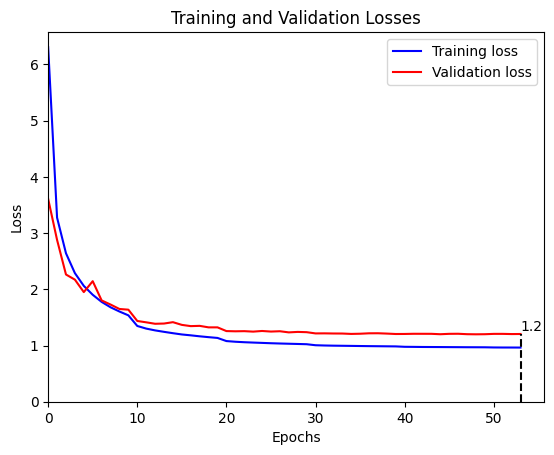

Traing epoch: 54   avg loss is: 0.9629637384146971
Testing epoch: 54   avg testing loss is: 1.2014899498031986
Validating on epoch: 54 has accuracy: top1: 95.88 top5: 98.85


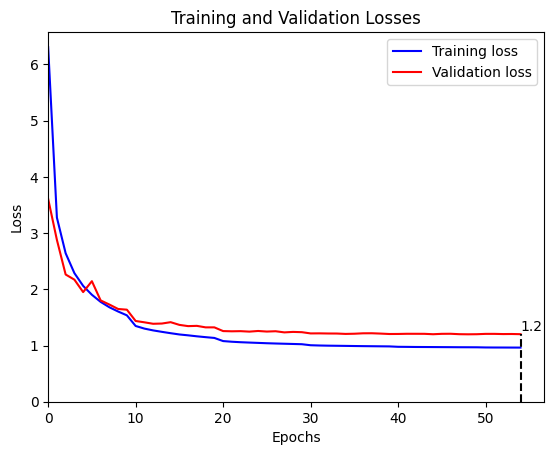

Traing epoch: 55   avg loss is: 0.9626309112820682
Testing epoch: 55   avg testing loss is: 1.2069085547039586
Validating on epoch: 55 has accuracy: top1: 95.80 top5: 98.76


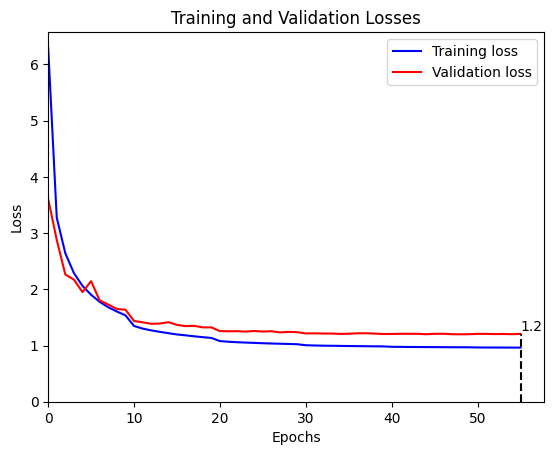

Traing epoch: 56   avg loss is: 0.9620956699581565
Testing epoch: 56   avg testing loss is: 1.201050498216383
Validating on epoch: 56 has accuracy: top1: 95.84 top5: 98.81


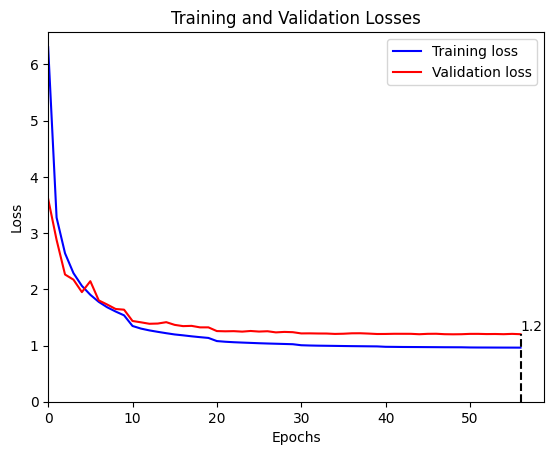

Traing epoch: 57   avg loss is: 0.9618379506602623
Testing epoch: 57   avg testing loss is: 1.2040834061561092
Validating on epoch: 57 has accuracy: top1: 95.67 top5: 98.84


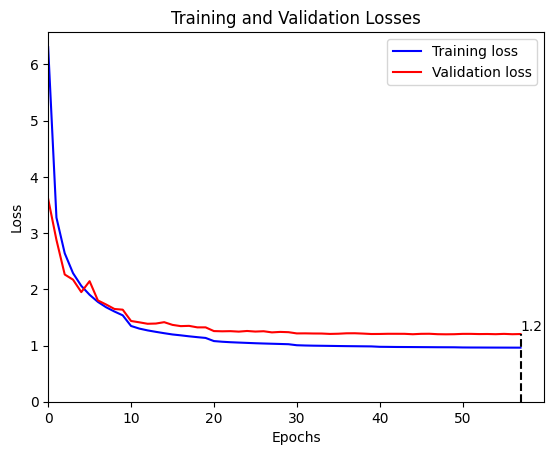

Traing epoch: 58   avg loss is: 0.961423027266831
Testing epoch: 58   avg testing loss is: 1.2035470744294505
Validating on epoch: 58 has accuracy: top1: 95.89 top5: 98.78


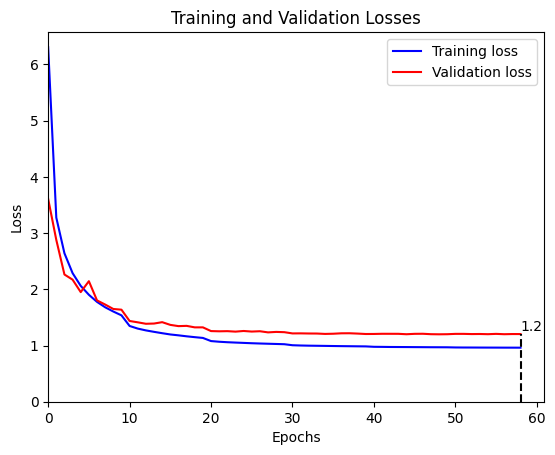

Traing epoch: 59   avg loss is: 0.9609127930279285
Testing epoch: 59   avg testing loss is: 1.2069927863536343
Validating on epoch: 59 has accuracy: top1: 95.86 top5: 98.74


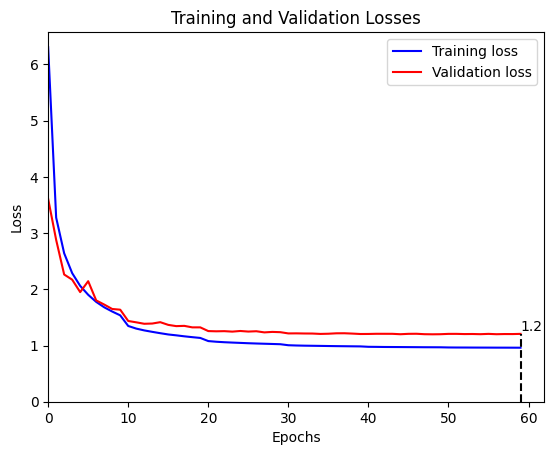

Traing epoch: 60   avg loss is: 0.9595893149142086
Testing epoch: 60   avg testing loss is: 1.2098604898298941
Validating on epoch: 60 has accuracy: top1: 95.77 top5: 98.82


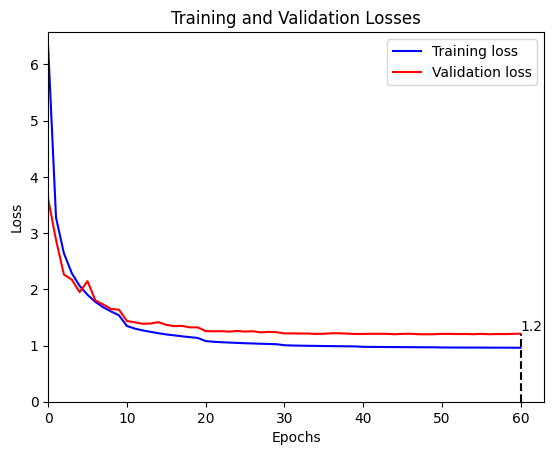

Traing epoch: 61   avg loss is: 0.9592002652496727
Testing epoch: 61   avg testing loss is: 1.206716547762194
Validating on epoch: 61 has accuracy: top1: 95.83 top5: 98.84


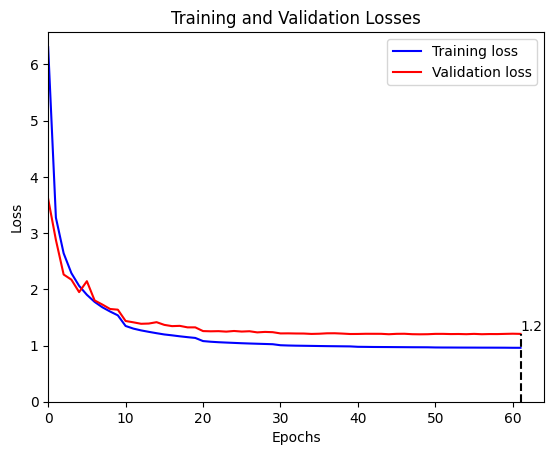

Traing epoch: 62   avg loss is: 0.9593568597224521
Testing epoch: 62   avg testing loss is: 1.2055046466089063
Validating on epoch: 62 has accuracy: top1: 95.96 top5: 98.82


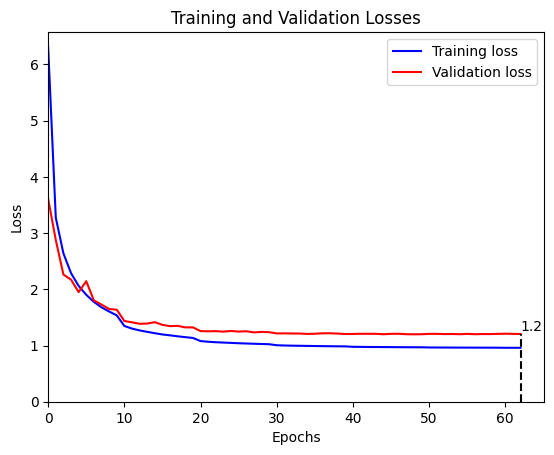

Traing epoch: 63   avg loss is: 0.9587814934367329
Testing epoch: 63   avg testing loss is: 1.2052774972492648
Validating on epoch: 63 has accuracy: top1: 95.91 top5: 98.81


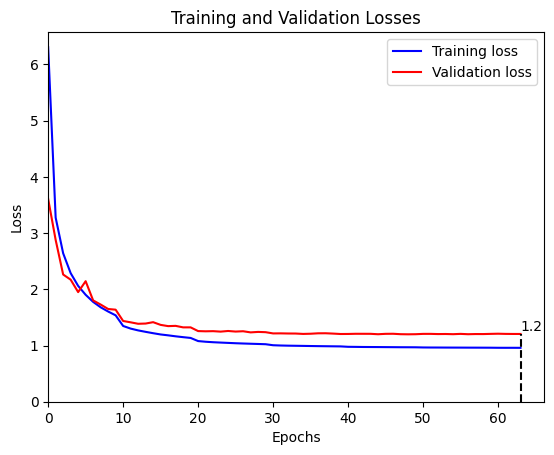

Traing epoch: 64   avg loss is: 0.9585354421987761
Testing epoch: 64   avg testing loss is: 1.2053725853081672
Validating on epoch: 64 has accuracy: top1: 96.00 top5: 98.79


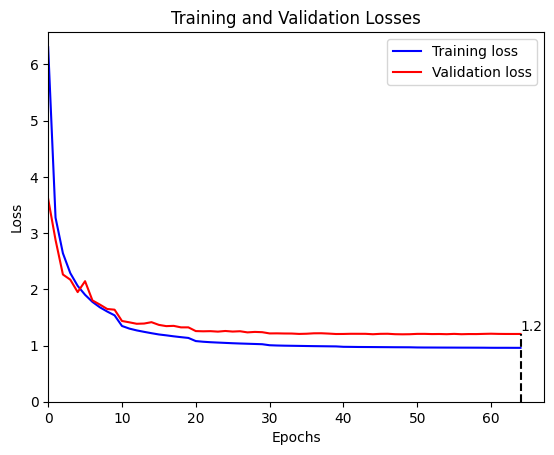

Traing epoch: 65   avg loss is: 0.9583265583904155
Testing epoch: 65   avg testing loss is: 1.2090019573127069
Validating on epoch: 65 has accuracy: top1: 95.87 top5: 98.83


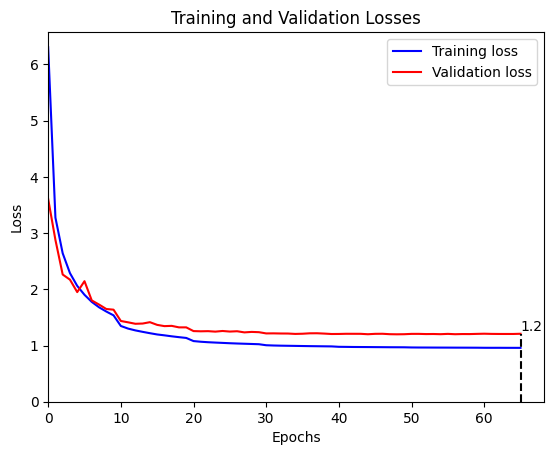

Traing epoch: 66   avg loss is: 0.9579978425441588
Testing epoch: 66   avg testing loss is: 1.2050060447185271
Validating on epoch: 66 has accuracy: top1: 95.91 top5: 98.82


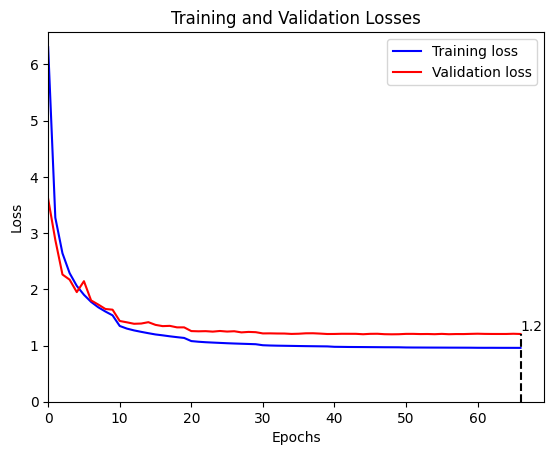

Traing epoch: 67   avg loss is: 0.9578528159616411
Testing epoch: 67   avg testing loss is: 1.2076221742937643
Validating on epoch: 67 has accuracy: top1: 95.84 top5: 98.83


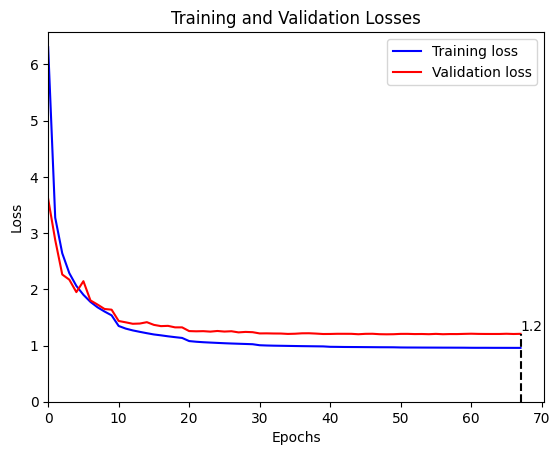

Traing epoch: 68   avg loss is: 0.957938323277164
Testing epoch: 68   avg testing loss is: 1.2051530008354494
Validating on epoch: 68 has accuracy: top1: 95.97 top5: 98.78


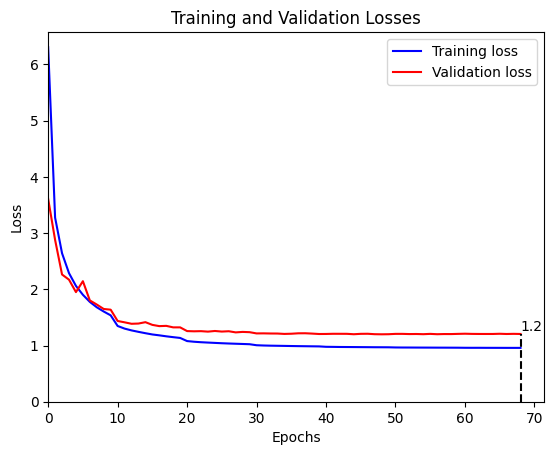

Traing epoch: 69   avg loss is: 0.957487507001945
Testing epoch: 69   avg testing loss is: 1.205011954807466
Validating on epoch: 69 has accuracy: top1: 95.85 top5: 98.82


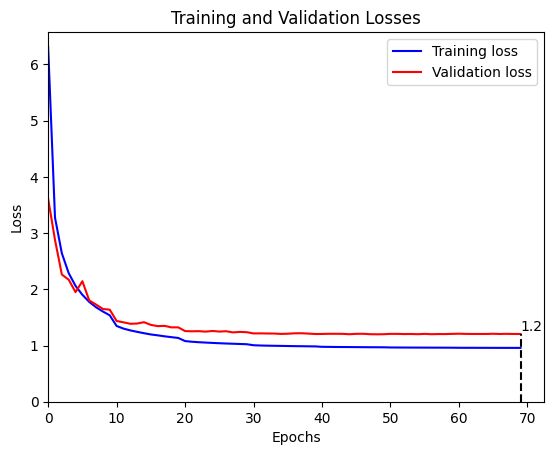

In [3]:
class DeepWriter_Train:
    def __init__(self,dataset='CERUG-EN',imgtype='png',mode='vertical'):

        self.dataset = dataset
        self.folder = dataset
        #self.labelfolder = 'dataset/'

        if not os.path.exists(self.folder):
            if dataset == 'CERUG-EN':
                download_cerug(dataset)
            elif dataset == 'Firemaker':
                download_firemaker(dataset)
            else:
                print('****** Warning: the dataset %s does not existed!******'%dataset)
                print('Please go to the following website to check how to download the dataset:')
                print('https://www.ai.rug.nl/~sheng/writeridataset.html')
                print('*'*20)
                raise ValueError('Dataset: %s does not existed!'%dataset)

        self.labelfolder = self.folder
        self.train_folder = self.folder+'/train/'
        self.test_folder = self.folder+'/test/'

        self.imgtype=imgtype
        self.mode = mode
        self.device = 'cuda'
        self.scale_size=(64,128)

        if self.device == 'cuda':
            torch.backends.cudnn.benchmark = True

        if self.dataset == 'CVL':
            self.imgtype = 'tif'

        self.model_dir = 'model'
        if not os.path.exists(self.model_dir):
            #raise ValueError('Model directory: %s does not existed'%self.model_dir)
            os.mkdir(self.model_dir)#raise ValueError('Model directory: %s does not existed'%self.model_dir)

        #basedir = 'GRRNN_WriterIdentification_dataset_'+self.dataset+'_model_'+self.mode+'_aug_16'
        basedir = 'CTE_CVL_model'+self.mode+'_aug_16'
        self.logfile= basedir + '.log'
        self.modelfile = basedir
        self.batch_size = 16

        train_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.train_folder,
                        imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = True)

        self.training_data_loader = DataLoader(dataset=train_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=True, drop_last=True)

        test_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.test_folder,imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = False)

        self.testing_data_loader = DataLoader(dataset=test_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=False)

        num_class = train_set.num_writer
        self.model = GrnnNet(1,num_classes=train_set.num_writer).to(self.device)

        #self.criterion = nn.CrossEntropyLoss()
        self.criterion = LabelSomCE()
        self.optimizer = optim.Adam(self.model.parameters(),lr=0.0001,weight_decay=1e-4)
        self.scheduler = lr_scheduler.StepLR(self.optimizer,step_size=10,gamma=0.5)


    def train(self,epoch):
        self.model.train()
        losstotal = []

        for iteration,batch in enumerate(self.training_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].type(torch.long).to(self.device)

            self.optimizer.zero_grad()

            logits = self.model(inputs)

            train_loss= self.criterion(logits,target)

            losstotal.append(train_loss.item())
            train_loss.backward()
            self.optimizer.step()

        with open(self.logfile,'a') as fp:
            fp.write('Training epoch %d avg loss is: %.6f\n'%(epoch,np.mean(losstotal)))
        print('Traing epoch:',epoch,'  avg loss is:',np.mean(losstotal))


        return np.mean(losstotal)


    def test(self,epoch,during_train=True):
        self.model.eval()
        losstotal = []

        if not during_train:
            self.load_model(epoch)

        top1 = 0
        top5 = 0
        ntotal=0

        for iteration,batch in enumerate(self.testing_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].to(self.device).long()

            logits = self.model(inputs)

            test_loss = self.criterion(logits,target)

            losstotal.append(test_loss.item())

            res = self.accuracy(logits,target,topk=(1,5))
            top1 += res[0]
            top5 += res[1]

            ntotal += inputs.size(0)



        top1 /= float(ntotal)
        top5 /= float(ntotal)

        print('Testing epoch:',epoch,'  avg testing loss is:',np.mean(losstotal))
        print('Validating on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
        with open(self.logfile,'a') as fp:
            fp.write('Validating epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))

        return np.mean(losstotal)



    def check_exists(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        return os.path.exists(model_out_path)

    def checkpoint(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        torch.save(self.model.state_dict(),model_out_path)


    def load_model(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        self.model.load_state_dict(torch.load(model_out_path,map_location=self.device))
        print('Load model successful')

    def plot_losses(self, training_losses, testing_losses):
        indices = range(len(training_losses))
        plt.plot(indices, training_losses, 'b', label='Training loss')
        plt.plot(indices, testing_losses, 'r', label='Validation loss')
        #
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.xlim(left=0)
        plt.ylim(bottom=0)

        last_epoch = indices[-1]
        last_test_loss = testing_losses[-1]
        plt.plot([last_epoch, last_epoch], [0, last_test_loss], 'k--')
        plt.text(last_epoch, last_test_loss, f'{last_test_loss:.1f}', color='k', va='bottom', ha='left')
        plt.savefig("/kaggle/working/loss_plot.svg", format="svg", dpi=300)
        
        plt.title('Training and Validation Losses')

        plt.show()
        
        
    def train_loops(self,start_epoch,num_epoch):
        #if self.check_exists(num_epoch): return
        if start_epoch > 0:
            self.load_model(start_epoch-1)

        training_losses = []
        testing_losses = []

        for epoch in range(start_epoch,num_epoch):
            train_loss = self.train(epoch)
            training_losses.append(train_loss)
            self.checkpoint(epoch)
            test_loss = self.test(epoch)
            testing_losses.append(test_loss)
            self.scheduler.step()
            self.plot_losses(training_losses, testing_losses)


    def accuracy(self,output,target,topk=(1,)):
        with torch.no_grad():
            maxk = max(topk)
            _,pred = output.topk(maxk,1,True,True)
            pred = pred.t()
            correct = pred.eq(target.view(1, -1).expand_as(pred))

            res = []
            for k in topk:
                correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
                res.append(correct_k.data.cpu().numpy())

        return res





if __name__ == '__main__':

    modelist = ['vertical','horizontal']
    mode = modelist[1]

    mod = DeepWriter_Train(dataset='/kaggle/input/cvl-words/cvl_word_segments',mode=mode)
    mod.train_loops(0,70)